# On the precision of the spectral estimates in pyqg

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pyqg

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
year = 24*60*60*360.
sig = 1.e-8

In [3]:
m = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=10*year)
m.run()

APEgenspec_orig = m.get_diagnostic('APEgenspec').sum(axis=0)
KEflux_orig = m.get_diagnostic('KEflux').sum(axis=0)
PEflux_orig = m.get_diagnostic('APEflux').sum(axis=0)

t=        72000000, tc=     10000: cfl=0.107330, ke=0.000416711
t=       144000000, tc=     20000: cfl=0.088642, ke=0.000534415
t=       216000000, tc=     30000: cfl=0.100980, ke=0.000464420
t=       288000000, tc=     40000: cfl=0.084356, ke=0.000511736


In [4]:
m = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=0)
m.run()

APEgenspec_tavestart0 = m.get_diagnostic('APEgenspec').sum(axis=0)
KEflux__tavestart0 = m.get_diagnostic('KEflux').sum(axis=0)
PEflux__tavestart0 = m.get_diagnostic('APEflux').sum(axis=0)

t=        72000000, tc=     10000: cfl=0.086263, ke=0.000353125
t=       144000000, tc=     20000: cfl=0.095164, ke=0.000487152
t=       216000000, tc=     30000: cfl=0.118566, ke=0.000488835
t=       288000000, tc=     40000: cfl=0.086664, ke=0.000464664


In [5]:
# generate 10 random seeds from 0,100
rseed = np.random.randint(low=0,high=100,size=25)

In [6]:
for i in range(rseed.size):
    
    m = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=10*year)
    
    rand = np.random.RandomState(seed=rseed[i])
    qi = sig*rand.standard_normal(m.q.shape)
    m.set_q(qi)
    
    m.run()
    
    print " "
    
    if i == 0:
        APEgenspec = m.get_diagnostic('APEgenspec').sum(axis=0)
        KEflux = m.get_diagnostic('KEflux').sum(axis=0)
        PEflux = m.get_diagnostic('APEflux').sum(axis=0)
    else:
        APEgenspec = np.vstack([APEgenspec, m.get_diagnostic('APEgenspec').sum(axis=0)])
        KEflux = np.vstack([KEflux, m.get_diagnostic('KEflux').sum(axis=0)])
        PEflux = np.vstack([PEflux, m.get_diagnostic('APEflux').sum(axis=0)])

t=        72000000, tc=     10000: cfl=0.012425, ke=0.000000630
t=       144000000, tc=     20000: cfl=0.084873, ke=0.000427286
t=       216000000, tc=     30000: cfl=0.110722, ke=0.000456588
t=       288000000, tc=     40000: cfl=0.096203, ke=0.000498547
 
t=        72000000, tc=     10000: cfl=0.012843, ke=0.000001171
t=       144000000, tc=     20000: cfl=0.101868, ke=0.000518671
t=       216000000, tc=     30000: cfl=0.096933, ke=0.000491673
t=       288000000, tc=     40000: cfl=0.101159, ke=0.000472881
 
t=        72000000, tc=     10000: cfl=0.012365, ke=0.000000898
t=       144000000, tc=     20000: cfl=0.086339, ke=0.000428746
t=       216000000, tc=     30000: cfl=0.096803, ke=0.000470302
t=       288000000, tc=     40000: cfl=0.099450, ke=0.000498898
 
t=        72000000, tc=     10000: cfl=0.012500, ke=0.000000757
t=       144000000, tc=     20000: cfl=0.084537, ke=0.000446886
t=       216000000, tc=     30000: cfl=0.102109, ke=0.000490367
t=       288000000, tc=     40000:

(6.2831853071795867e-06, 0.00020106192982974677)

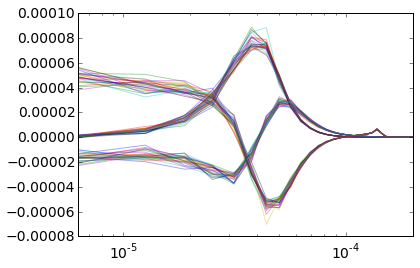

In [7]:
for i in range(rseed.size):
    
    plt.semilogx(m.kk, APEgenspec[i],alpha=.35)
    plt.semilogx(m.kk, PEflux[i],alpha=.35)
    plt.semilogx(m.kk, KEflux[i],alpha=.35)
    
plt.xlim([m.kk.min(), m.kk.max()])
    

(6.2831853071795867e-06, 0.00020106192982974677)

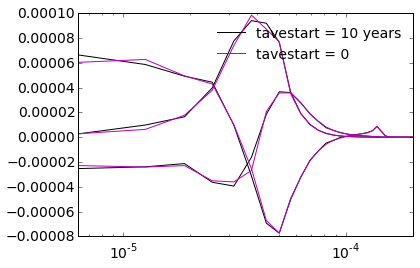

In [8]:
plt.semilogx(m.kk, APEgenspec_orig,'k')
plt.semilogx(m.kk, PEflux_orig,'k')
plt.semilogx(m.kk, KEflux_orig,'k',label='tavestart = 10 years')
    
plt.semilogx(m.kk, APEgenspec_tavestart0,'m')
plt.semilogx(m.kk, PEflux__tavestart0,'m')
plt.semilogx(m.kk, KEflux__tavestart0,'m',label='tavestart = 0')
   
plt.legend()
    
plt.xlim([m.kk.min(), m.kk.max()])
